In [19]:
# testing different use cases of API

import requests

response = requests.get("http://placegoat.com/200/200")
print(response.headers.get("Content-Type"))

text/html; charset=utf-8


In [2]:
# using dictionary to define headers

headers = {"X-Request-Id": "<my-request-id>"}
response = requests.get("https://example.org", headers=headers)
response.request.headers

{'User-Agent': 'python-requests/2.28.1', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive', 'X-Request-Id': '<my-request-id>'}

In [3]:
# Most APIs use JSON as the default content type

response = requests.get("https://api.thedogapi.com/v1/breeds/1")
response.headers.get("Content-Type")

'application/json; charset=utf-8'

In [9]:
# when trying to fetch the image of a dog, it returns image/jpeg instead

response = requests.get("https://images.dog.ceo/breeds/terrier-border/n02093754_186.jpg")
response

response.headers.get("Content-Type")

'image/jpeg'

- Type of content you find in the API response will vary according to the Content-Type header

  - .text returns the response contents in Unicode format.
  - .content returns the response contents in bytes.
>
- Images and other nontextual data, using .content is typically a better approach, even if it returns a very similar result to .text



- Response’s Content-Type header, you can see the content is application/json;, a JSON object. For that kind of content, the requests library includes a specific .json() method that you can use to immediately convert the API bytes response into a Python data structure:

In [13]:
response = requests.get("https://api.thedogapi.com/v1/breeds/1")
response.headers.get("Content-Type")

response.json()

# response.json()["name"]
# response.json()["life_span"]

{'weight': {'imperial': '6 - 13', 'metric': '3 - 6'},
 'height': {'imperial': '9 - 11.5', 'metric': '23 - 29'},
 'id': 1,
 'name': 'Affenpinscher',
 'bred_for': 'Small rodent hunting, lapdog',
 'breed_group': 'Toy',
 'life_span': '10 - 12 years',
 'temperament': 'Stubborn, Curious, Playful, Adventurous, Active, Fun-loving',
 'origin': 'Germany, France',
 'reference_image_id': 'BJa4kxc4X'}

- Now, let's look at the image.

In [14]:
response = requests.get("http://placegoat.com/200/200")
response

response.headers.get("Content-Type")

response.content

b'<!DOCTYPE html>\n<html lang="en">\n<head>\n\n<script id="cookieyes" type="text/javascript" src="https://cdn-cookieyes.com/client_data/e71bc53f1cb88666d160c1e2/script.js"></script>\n\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\n\n<meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">\n<link rel="preconnect" href="https://www.google.com">\n<link rel="preconnect" href="https://www.gstatic.com" crossorigin>\n<link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/fancyapps/fancybox@3.5.7/dist/jquery.fancybox.min.css" />\n<link rel="stylesheet" href="https://static.HugeDomains.com/css/hdv3-css/reboot.min.css">\n<link rel="stylesheet" href="https://static.HugeDomains.com/css/hdv3-css/style.css?aa=2021-06-09a">\n<link rel="stylesheet" href="https://static.HugeDomains.com/css/hdv3-css/responsive.css?aa=2021-06-09a">\n<link rel="stylesheet" href="https://static.HugeDomains.com/css/hdv3-css/hd-style.css?aa=2022-10-33">\n<meta name="them

- In this case, because you’re requesting an image, .content isn’t very helpful. In fact, it’s nearly impossible to understand. However, you know this is a JPEG image, so you can try storing it into a file and see what happens:

In [18]:
response = requests.get("https://images.dog.ceo/breeds/husky/n02110185_11445.jpg")
response

response.headers.get("Content-Type")

file = open("dog.jpeg", "wb")
file.write(response.content)
file.close()

Now, the dog's image should be in the same folder as the project folder, which is the random image of a dog using API.

#### HTTP Methods
When calling an API, there are a few different methods, also called verbs, that you can use to specify what action you want to execute.

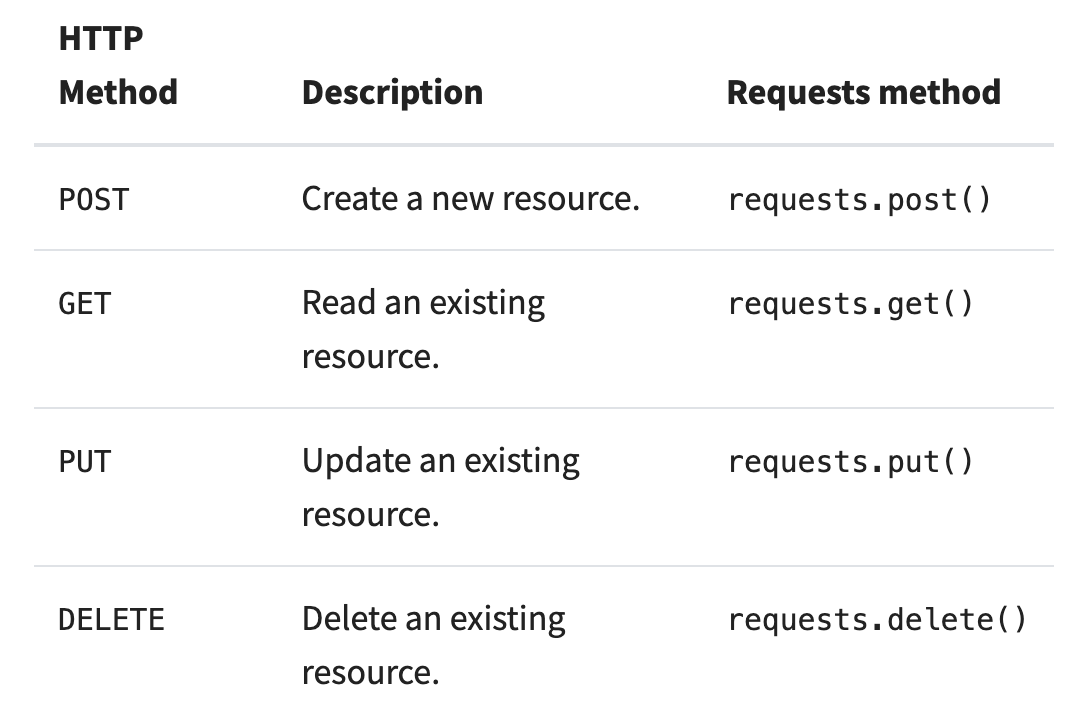

#### Query Parameters

You might have seen or used query parameters when browsing online. For example when watching a YouTube video, you have a URL like https://www.youtube.com/watch?v=aL5GK2LVMWI. The v= in the URL is what you call a **query parameter**. It typically comes after the base URL and endpoint.

To add a query parameter to a given URL, you have to add a question mark (?) before the first query parameter. If you want to have multiple query parameters in your request, then you can split them with an ampersand (&).

The same YouTube URL above with multiple query parameters would look like this: https://www.youtube.com/watch?v=aL5GK2LVMWI&t=75.

In [19]:
requests.get("https://randomuser.me/api/").json()

{'results': [{'gender': 'male',
   'name': {'title': 'Mr', 'first': 'Gökhan', 'last': 'Kuday'},
   'location': {'street': {'number': 7780, 'name': 'Atatürk Sk'},
    'city': 'İstanbul',
    'state': 'Bursa',
    'country': 'Turkey',
    'postcode': 44761,
    'coordinates': {'latitude': '68.1928', 'longitude': '-18.1947'},
    'timezone': {'offset': '0:00',
     'description': 'Western Europe Time, London, Lisbon, Casablanca'}},
   'email': 'gokhan.kuday@example.com',
   'login': {'uuid': '787c0636-99e7-4cfc-9f70-e8d90e100fd1',
    'username': 'heavybear918',
    'password': 'woofwoof',
    'salt': 'JJ4BX8Xv',
    'md5': '15c1245794a53661017640fb335e0c46',
    'sha1': '57056394348a1a68bf678244977e0e22155a263e',
    'sha256': '94924853e502a5a6c708ed352f9de6c8e43f0af7e993b358b21f11208f236337'},
   'dob': {'date': '1974-11-16T14:34:31.904Z', 'age': 48},
   'registered': {'date': '2018-12-16T11:29:34.149Z', 'age': 4},
   'phone': '(090)-009-8155',
   'cell': '(561)-009-3721',
   'id': {'na

However, let’s say you specifically want to generate only random female users. According to the documentation, you can use the query parameter gender= for that:

In [21]:
requests.get("https://randomuser.me/api/?gender=female").json()

{'results': [{'gender': 'female',
   'name': {'title': 'Mrs', 'first': 'Shraddha', 'last': 'Keshri'},
   'location': {'street': {'number': 2551, 'name': 'Mirza Ghalib St'},
    'city': 'Tinsukia',
    'state': 'Odisha',
    'country': 'India',
    'postcode': 13101,
    'coordinates': {'latitude': '10.7970', 'longitude': '94.5558'},
    'timezone': {'offset': '-2:00', 'description': 'Mid-Atlantic'}},
   'email': 'shraddha.keshri@example.com',
   'login': {'uuid': '6a648eb0-7d37-4dad-bdda-f93d69294ae4',
    'username': 'smallostrich960',
    'password': 'south',
    'salt': 'BZpB1N1E',
    'md5': 'bb7445f7fd06f36495b8abb9336e6e4c',
    'sha1': '7f108d804b264c54c426d74afdf72c784108ad73',
    'sha256': 'e61f3666c8cc724405b500886bd34820aedb215b08c89a2ea2e2a8bc2a612228'},
   'dob': {'date': '1979-10-23T11:55:50.827Z', 'age': 43},
   'registered': {'date': '2006-11-05T00:30:12.498Z', 'age': 16},
   'phone': '8615369286',
   'cell': '7661906773',
   'id': {'name': 'UIDAI', 'value': '772811896

That’s great! Now let’s say you want to generate only female users from Germany. Again, looking through the documentation, you find a section on nationality, and you can use the query parameter nat= for that:



In [22]:
requests.get("https://randomuser.me/api/?gender=female&nat=de").json()

{'results': [{'gender': 'female',
   'name': {'title': 'Mrs', 'first': 'Ramona', 'last': 'Sänger'},
   'location': {'street': {'number': 1331, 'name': 'Mittelstraße'},
    'city': 'Hirschhorn (Neckar)',
    'state': 'Baden-Württemberg',
    'country': 'Germany',
    'postcode': 42687,
    'coordinates': {'latitude': '-52.4986', 'longitude': '108.1552'},
    'timezone': {'offset': '-8:00',
     'description': 'Pacific Time (US & Canada)'}},
   'email': 'ramona.sanger@example.com',
   'login': {'uuid': 'e622a605-2298-4c7e-ae41-6ee03323c0c5',
    'username': 'goldenbird442',
    'password': 'sweet1',
    'salt': 'llMIWC5i',
    'md5': 'efed6635e1babb2bb71d6d44b82e9040',
    'sha1': 'd228f64432fe3fdebd3719eb9cb30b658d81d782',
    'sha256': '36d832af1910324cc01beaea28ff3094d23176eb5b6857d3316d519fd404e52b'},
   'dob': {'date': '1996-02-14T04:53:57.165Z', 'age': 27},
   'registered': {'date': '2020-09-18T02:49:37.415Z', 'age': 2},
   'phone': '0221-2707382',
   'cell': '0176-8241125',
   'id

To avoid having to rebuild the URL over and over again, you can use the params attribute to send in a dictionary of all query parameters to append to a URL:

In [24]:
query_params = {"gender": "female",
                "nat": "de"}

endpoint = "https://randomuser.me/api/"

requests.get(endpoint, params=query_params).json()


{'results': [{'gender': 'female',
   'name': {'title': 'Ms', 'first': 'Angelika', 'last': 'Rudolf'},
   'location': {'street': {'number': 9902, 'name': 'Brunnenstraße'},
    'city': 'Schriesheim',
    'state': 'Rheinland-Pfalz',
    'country': 'Germany',
    'postcode': 98552,
    'coordinates': {'latitude': '-4.1184', 'longitude': '-163.3734'},
    'timezone': {'offset': '-3:00',
     'description': 'Brazil, Buenos Aires, Georgetown'}},
   'email': 'angelika.rudolf@example.com',
   'login': {'uuid': 'bc5f2caf-2b18-4f17-9b66-67c0b02a7383',
    'username': 'happygorilla487',
    'password': 'pics',
    'salt': 'kTgI9eDZ',
    'md5': '1f18e9a83c3a8a90ca5e1a0c73ae60a0',
    'sha1': '992f9547f3cbb3199dbf4287dbb03392ce6476ea',
    'sha256': 'fc8f0cd3192d36ec02adbc297ef5afca378207fab150afb6a99a02e9b40e25aa'},
   'dob': {'date': '1971-08-25T14:32:54.042Z', 'age': 51},
   'registered': {'date': '2017-07-13T07:09:26.414Z', 'age': 5},
   'phone': '0601-6415265',
   'cell': '0170-7955471',
   'id

#### Advanced API Concepts

there are a few more advanced topics that are worth touching upon, even if briefly, such as authentication, pagination, and rate limiting.



#### Authentication

API Keys

> The most common level of authentication is the API key. These keys are used to identify you as an API user or customer and to trace your use of the API. API keys are typically sent as a request header or as a query parameter.

In [25]:
endpoint = "https://api.nasa.gov/mars-photos/api/v1/rovers/curiosity/photos"
api_key = "gs0SVxPgqdDZqkOEi90R3cyZGl7dz7XxxUTgrPnN"

query_params = {"api_key": api_key, "earth_date": "2020-07-01"}
response = requests.get(endpoint, params=query_params)
response # the response is 200 which is good.

<Response [200]>

Let's extract some pictures from the response objects.

In [27]:
# response.headers.get("Content-Type")

response.json()

{'photos': [{'id': 754118,
   'sol': 2809,
   'camera': {'id': 20,
    'name': 'FHAZ',
    'rover_id': 5,
    'full_name': 'Front Hazard Avoidance Camera'},
   'img_src': 'https://mars.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/02809/opgs/edr/fcam/FLB_646868981EDR_F0810628FHAZ00337M_.JPG',
   'earth_date': '2020-07-01',
   'rover': {'id': 5,
    'name': 'Curiosity',
    'landing_date': '2012-08-06',
    'launch_date': '2011-11-26',
    'status': 'active'}},
  {'id': 754119,
   'sol': 2809,
   'camera': {'id': 20,
    'name': 'FHAZ',
    'rover_id': 5,
    'full_name': 'Front Hazard Avoidance Camera'},
   'img_src': 'https://mars.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/02809/opgs/edr/fcam/FRB_646868981EDR_F0810628FHAZ00337M_.JPG',
   'earth_date': '2020-07-01',
   'rover': {'id': 5,
    'name': 'Curiosity',
    'landing_date': '2012-08-06',
    'launch_date': '2011-11-26',
    'status': 'active'}},
  {'id': 754120,
   'sol': 2809,
   'camera': {'id': 20,
   

In [28]:
photos = response.json()["photos"]
print(f"Found {len(photos)} photos")

photos[4]["img_src"]

Found 12 photos


'https://mars.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/02809/opgs/edr/rcam/RRB_646869036EDR_F0810628RHAZ00337M_.JPG'

#### OAuth: Getting Started

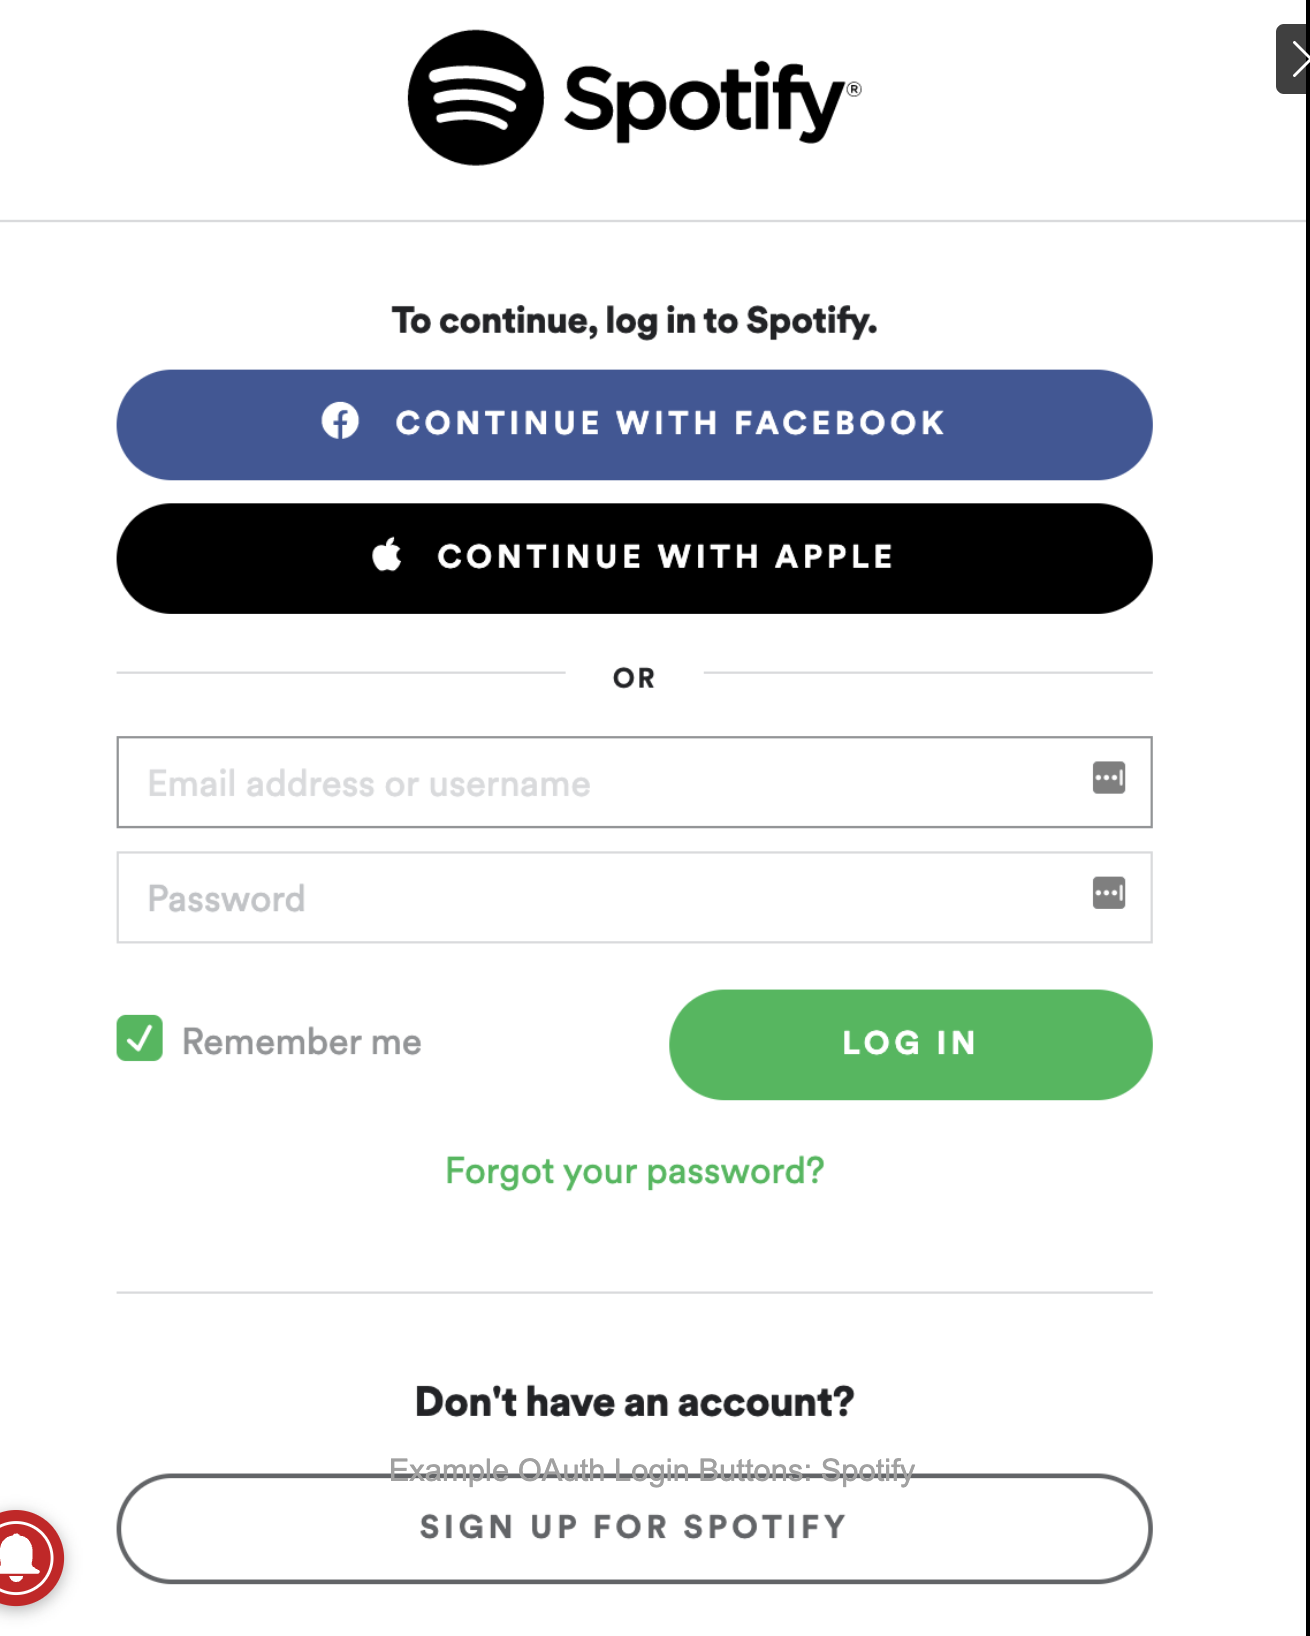

Here’s a step-by-step breakdown of what will happen if you click Continue With Facebook:

1. The Spotify app will ask the Facebook API to start an authentication flow. To do this, the Spotify app will send its application ID (client_id) and a URL (redirect_uri) to redirect the user after success or error.

2. You’ll be redirected to the Facebook website and asked to log in with your credentials. The Spotify app won’t see or have access to these credentials. This is the most important benefit of OAuth.

3. Facebook will show you all the data the Spotify app is requesting from your profile and ask you to accept or reject sharing that data.

4. If you accept giving Spotify access to your data, then you’ll be redirected back to the Spotify app, already logged in.

When going through step 4, Facebook will provide Spotify with a special credential (access_token) that can be used repeatedly to fetch your information. This specific Facebook login token is valid for sixty days, but other apps might have different expiration periods. If you’re curious, then Facebook has a settings page that you can check to see which apps have been given your Facebook access token.

Now, from a more technical standpoint, here are the things you need to know when consuming APIs using OAuth:

- You need to create an application that will have an ID (app_id or client_id) and a secret (app_secret or client_secret).
- You need to have a redirect URL (redirect_uri), which the API will use to send information to you.
- You’ll get a code as the result of the authentication, which you need to exchange for an access token.

There are a few variations to the above, but generally speaking, most OAuth flows will have steps similar to these.

In [5]:
pip install python-dotenv

  Using cached python_dotenv-1.0.0-py3-none-any.whl (19 kB)
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [17]:
# getting secret API key from .env file
from dotenv import load_dotenv
import os

# def configure():
  # load_dotenv()
  
load_dotenv()

client_id = os.getenv("client_id")
client_secret = os.getenv('client_secret')

redirect_url = os.getenv('redirect_url')

# creating a link to redirect the user to their GitHub Account

def create_oauth_link():
    params = {
        "client_id": client_id,
        "redirect_uri": redirect_url,
        "scope": "user",
        "response_type": "code",
    }
    
    endpoint = "https://github.com/login/oauth/authorize"
    response = requests.get(endpoint, params=params)
    url = response.url
    return url


In this piece of code, you first define the required parameters that the API expects and then call the API using the requests package and .get().

When you make the request to the /login/oauth/authorize endpoint, the API will automatically redirect you to the GitHub website. In that case, you want to fetch the url parameter from the response. This parameter contains the exact URL that GitHub is redirecting you to.

The next step in the authorization flow is to exchange the code you get for an access token. Again, following the steps in GitHub’s documentation, you can make a method for it:

In [15]:
def exchange_code_for_access_token(code=None):
    params = {
        "client_id": client_id,
        "client_secret": client_secret,
        "redirect_uri": redirect_url,
        "code": code,
    }

    headers = {"Accept": "application/json"}
    endpoint = "https://github.com/login/oauth/access_token"
    response = requests.post(endpoint, params=params, headers=headers).json()
    return response["access_token"]

In [20]:
link = create_oauth_link()
print(f"Follow the link to start the authentication with GitHub: {link}")
code = input("GitHub code: ")
access_token = exchange_code_for_access_token(code)
print(f"Exchanged code {code} with access token: {access_token}")

Follow the link to start the authentication with GitHub: https://github.com/login?client_id=41de9697c26891849ccc&return_to=%2Flogin%2Foauth%2Fauthorize%3Fclient_id%3D41de9697c26891849ccc%26redirect_uri%3Dhttps%253A%252F%252Fhttpbin.org%252Fanything%26response_type%3Dcode%26scope%3Duser


KeyError: 'access_token'

Putting it all together, we have:

In [43]:
# getting secret API key from .env file
from dotenv import load_dotenv
import os

# def configure():
    # load_dotenv()

load_dotenv()

client_id = os.getenv("client_id")
client_secret = os.getenv('client_secret')

redirect_url = os.getenv('redirect_url')

# creating a link to redirect the user to their GitHub Account

def create_oauth_link():
    params = {
        "client_id": client_id,
        "redirect_uri": redirect_url,
        "scope": "user",
        "response_type": "code",
    }
    
    endpoint = "https://github.com/login/oauth/authorize"
    response = requests.get(endpoint, params=params)
    url = response.url
    return url

def exchange_code_for_access_token(code=None):
    params = {
        "client_id": client_id,
        "client_secret": client_secret,
        "redirect_uri": redirect_url,
        # "code": code,
        "code": "51db716977316e0d7c81"
    }

    headers = {"Accept": "application/json"}
    endpoint = "https://github.com/login/oauth/access_token"
    response = requests.post(endpoint, params=params, headers=headers).json()
    return response["access_token"]

link = create_oauth_link()
print(f"Follow the link to start the authentication with GitHub: {link}")
code = input("GitHub code: ")
access_token = exchange_code_for_access_token(code)
print(f"Exchanged code {code} with access token: {access_token}")


Follow the link to start the authentication with GitHub: https://github.com/login?client_id=41de9697c26891849ccc&return_to=%2Flogin%2Foauth%2Fauthorize%3Fclient_id%3D41de9697c26891849ccc%26redirect_uri%3Dhttps%253A%252F%252Fhttpbin.org%252Fanything%26response_type%3Dcode%26scope%3Duser


KeyError: 'access_token'

In [22]:
# getting secret API key from .env file
from dotenv import load_dotenv
import os

# def configure():
    # load_dotenv()

load_dotenv()

client_id = os.getenv("client_id")
client_secret = os.getenv('client_secret')

redirect_url = os.getenv('redirect_url')

# creating a link to redirect the user to their GitHub Account

def create_oauth_link():
    params = {
        "client_id": client_id,
        "redirect_uri": redirect_url,
        "scope": "user",
        "response_type": "code",
    }
    endpoint = "https://github.com/login/oauth/authorize"
    response = requests.get(endpoint, params=params)
    url = response.url
    return url

def exchange_code_for_access_token(code=None):
    params = {
        "client_id": client_id,
        "client_secret": client_secret,
        "redirect_uri": redirect_url,
        "code": code,
    }
    headers = {"Accept": "application/json"}
    endpoint = "https://github.com/login/oauth/access_token"
    response = requests.post(endpoint, params=params, headers=headers).json()
    return response["access_token"]

def print_user_info(access_token=None):
    headers = {"Authorization": f"token {access_token}"}
    endpoint = "https://api.github.com/user"
    response = requests.get(endpoint, headers=headers).json()
    name = response["name"]
    username = response["login"]
    private_repos_count = response["total_private_repos"]
    print(
        f"{name} ({username}) | private repositories: {private_repos_count}"
    )

link = create_oauth_link()
print(f"Follow the link to start the authentication with GitHub: {link}")
code = input("GitHub code: ")
access_token = exchange_code_for_access_token(code)
print(f"Exchanged code {code} with access token: {access_token}")
print_user_info(access_token=access_token)

Follow the link to start the authentication with GitHub: https://github.com/login?client_id=41de9697c26891849ccc&return_to=%2Flogin%2Foauth%2Fauthorize%3Fclient_id%3D41de9697c26891849ccc%26redirect_uri%3Dhttps%253A%252F%252Fhttpbin.org%252Fanything%26response_type%3Dcode%26scope%3Duser


KeyError: 'access_token'

In [62]:
params = {
        "client_id": client_id,
        "client_secret": client_secret,
        "redirect_uri": redirect_url,
        # "code": code,
        "code": "e46e494d351db88a856c"
    }

headers = {"Accept": "application/json"}
endpoint = "https://github.com/login/oauth/access_token"
response = requests.post(endpoint, params=params, headers=headers).json()
response["access_token"]

KeyError: 'access_token'

In [61]:
params = {
        "client_id": client_id,
        "redirect_uri": redirect_url,
        "scope": "user",
        "response_type": "code",
    }

endpoint = "https://github.com/login/oauth/authorize"
response = requests.get(endpoint, params=params)
url = response.url
# return url

In [52]:
link = create_oauth_link()
print(f"Follow the link to start the authentication with GitHub: {link}")
# code = input("GitHub code: ")
code = "e46e494d351db88a856c"
access_token = exchange_code_for_access_token(code)
print(f"Exchanged code {code} with access token: {access_token}")

Follow the link to start the authentication with GitHub: https://github.com/login?client_id=41de9697c26891849ccc&return_to=%2Flogin%2Foauth%2Fauthorize%3Fclient_id%3D41de9697c26891849ccc%26redirect_uri%3Dhttps%253A%252F%252Fhttpbin.org%252Fanything%26response_type%3Dcode%26scope%3Duser


KeyError: 'access_token'

In [57]:
exchange_code_for_access_token(code)

KeyError: 'access_token'

In [63]:
response["access_token"]

KeyError: 'access_token'